In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import os, glob
from PIL import Image

In [27]:
#影像的輸入大小
im_W = 28
im_H = 28

#影像的path
class_path = "Car License Plate Number/Total"

#影像該位置的所有檔案名稱
class_filenames = os.listdir(class_path)
print(len(class_filenames))

#建立空陣列並定義大小，將給予輸入存取的空間：根據影像數量與輸入大小及維度
data_2d = np.empty((len(class_filenames), im_W,im_H), dtype="uint8")

#建立皆為0且檔案數量的label
label = [0] * len(class_filenames)

1800


In [42]:
mnist_label_name = [i for i in range(10)]
AZ_label_name = [chr(i+65) for i in range(26)]
label_name = np.hstack([mnist_label_name, AZ_label_name])
label_index = [i for i in range(36)]

print(label_name)
print(label_index)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [43]:
#塞制空陣列的輸入與label
for i in range(len(class_filenames)):
    
    #label根據檔案名字前一個字，取代之前建利皆為0的label
    for j in range(len(label_name)):
        if(class_filenames[i][0] == label_name[j]):
            label[i] = label_index[j]
        
    #每一影像讀取
    img = Image.open(class_path + "/" + class_filenames[i])
    
    #轉灰階
    img = img.convert('L')
    
    #每一影像改變大小
    reimg = img.resize((im_W,im_H,))
    
    #將該影像轉成陣列
    npimg_2d = np.asarray(reimg, dtype="uint8")
    
    #持續將影像陣列蓋掉之前空陣列
    data_2d[i,:,:] = npimg_2d

In [44]:
from keras.utils import to_categorical
from collections import Counter

#打印出影像的維度與標籤的維度
print("影像2d的維度：", data_2d.shape)
print("標籤的維度：", len(label)) 

#打印出訓練集的每個類別數量
print("訓練集標籤數量：%s" %(len(label)))
print("訓練集標籤的類別數量：",Counter(label))

#將Label轉為One-hot-encode
y_train = to_categorical(label)

#print("原始標籤：", label[0])
#print("獨熱編碼標籤：", label_ohe[0])

影像2d的維度： (1800, 28, 28)
標籤的維度： 1800
訓練集標籤數量：1800
訓練集標籤的類別數量： Counter({11: 50, 10: 50, 21: 50, 7: 50, 27: 50, 8: 50, 35: 50, 9: 50, 14: 50, 15: 50, 33: 50, 0: 50, 30: 50, 29: 50, 19: 50, 34: 50, 26: 50, 4: 50, 6: 50, 20: 50, 31: 50, 3: 50, 12: 50, 18: 50, 1: 50, 16: 50, 23: 50, 22: 50, 28: 50, 13: 50, 24: 50, 32: 50, 2: 50, 25: 50, 5: 50, 17: 50})


In [30]:
#正規化處理
non_data_2d = data_2d.astype('float32')/255

In [31]:
x_train = np.expand_dims(non_data_2d,-1)
print(x_train.shape)

(1800, 28, 28, 1)


In [32]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same', input_shape=(28,28,1)))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dropout(0.25))
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(36, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [33]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
history = cnn.fit(x=x_train, y=y_train, batch_size=128, epochs=20, validation_data=(x_train, y_train))

Epoch 1/20
15/15 [==============================] - 1s 85ms/step - loss: 2.4711 - acc: 0.4233 - val_loss: 1.2420 - val_acc: 0.7283
Epoch 2/20
15/15 [==============================] - 1s 76ms/step - loss: 0.5582 - acc: 0.8333 - val_loss: 0.4078 - val_acc: 0.9511
Epoch 3/20
15/15 [==============================] - 1s 77ms/step - loss: 0.1900 - acc: 0.9433 - val_loss: 0.1939 - val_acc: 0.9556
Epoch 4/20
15/15 [==============================] - 1s 77ms/step - loss: 0.1296 - acc: 0.9611 - val_loss: 0.1566 - val_acc: 0.9706
Epoch 5/20
15/15 [==============================] - 1s 76ms/step - loss: 0.0908 - acc: 0.9661 - val_loss: 0.1214 - val_acc: 0.9672
Epoch 6/20
15/15 [==============================] - 1s 81ms/step - loss: 0.0789 - acc: 0.9700 - val_loss: 0.0915 - val_acc: 0.9706
Epoch 7/20
15/15 [==============================] - 1s 87ms/step - loss: 0.0622 - acc: 0.9672 - val_loss: 0.0771 - val_acc: 0.9750
Epoch 8/20
15/15 [==============================] - 1s 88ms/step - loss: 0.0659 - a

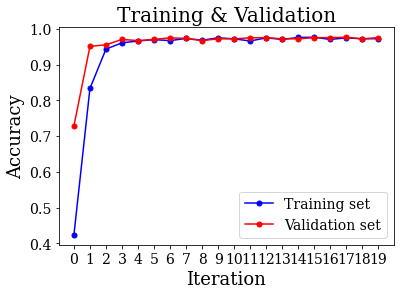

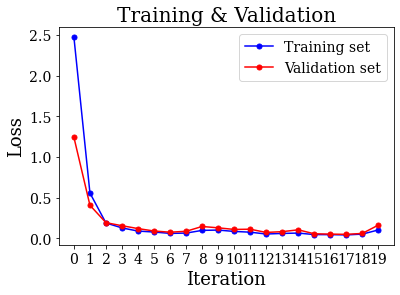

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.rcParams["font.family"] = "serif"
plt.title("Training & Validation", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.plot(np.arange(len(acc)), acc,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(val_acc)), val_acc,color='r', label="Validation set", marker='o', markersize=5)
plt.xticks(np.linspace(0,19,20,endpoint=True),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right',fontsize=14)
plt.show()

plt.title("Training & Validation", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.plot(np.arange(len(loss)), loss,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(val_loss)), val_loss,color='r', label="Validation set", marker='o', markersize=5)
plt.xticks(np.linspace(0,19,20,endpoint=True),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=14)
plt.show()

In [36]:
train_loss, train_acc = cnn.evaluate(x_train, y_train)
print("訓練集的準確度為：%0.4f" %(train_acc))
print("訓練集的損失值為：%0.4f" %(train_loss))

57/57 [==============================] - 0s 5ms/step - loss: 0.1638 - acc: 0.9756
訓練集的準確度為：0.9756
訓練集的損失值為：0.1638


In [37]:
predict = cnn.predict(x_train)
predictions = [np.argmax(one_hot)for one_hot in predict]

Text(0.5, 1.0, 'Accuracy: 0.9756')

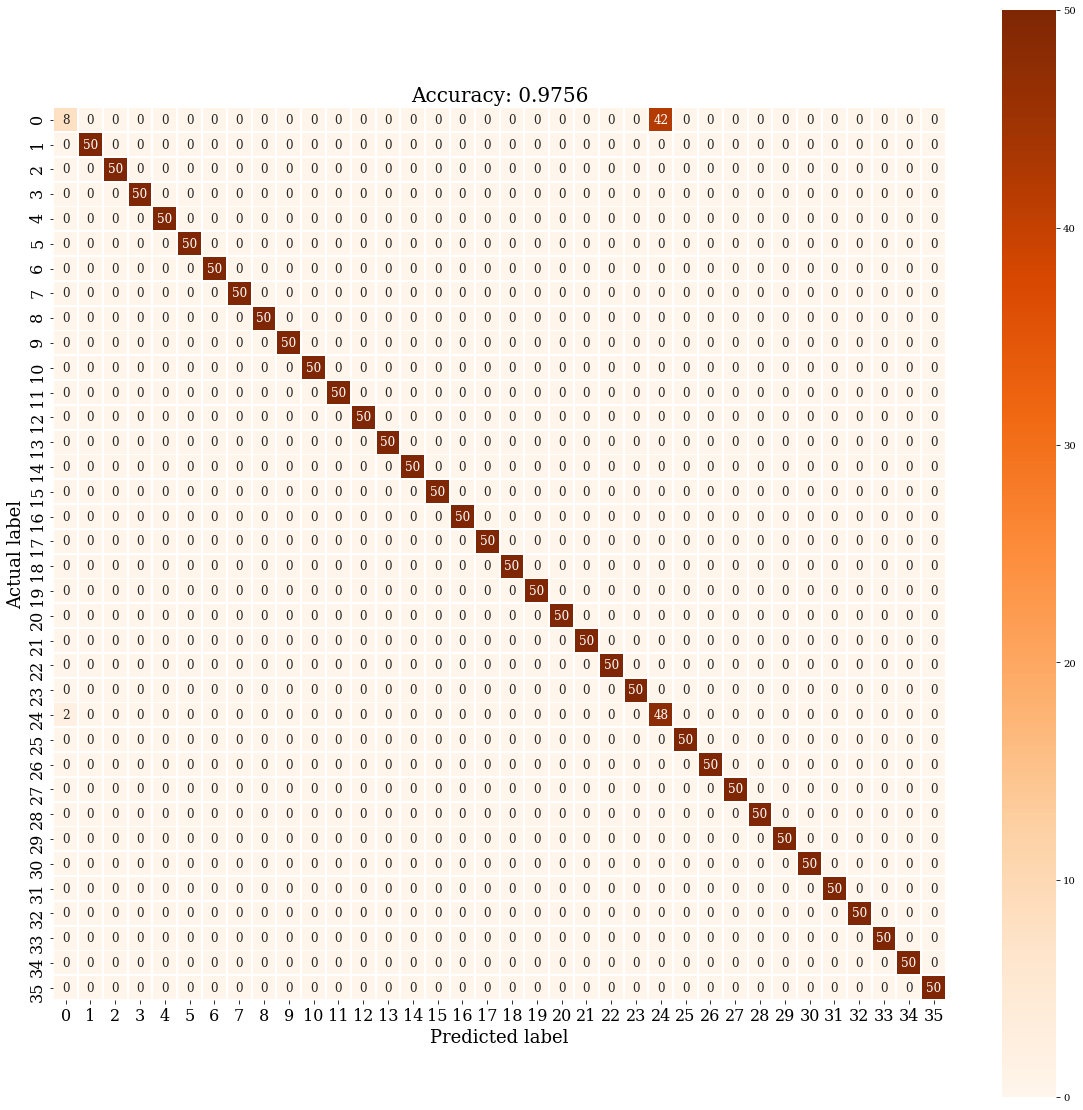

In [38]:
cm = confusion_matrix(label, predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0,
square = True, cmap = 'Oranges',annot_kws={"size": 12})
plt.ylabel('Actual label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accuracy: %0.4f' %(train_acc), size = 20)

In [39]:
cnn.save('cnn_model_car.h5')
from tensorflow.keras.models import load_model
cnn = load_model('cnn_model_car.h5')